In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
milk_production = pd.read_csv('.//milk_production.csv',  parse_dates=True, index_col=[0])
display(milk_production.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pounds_per_cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


None

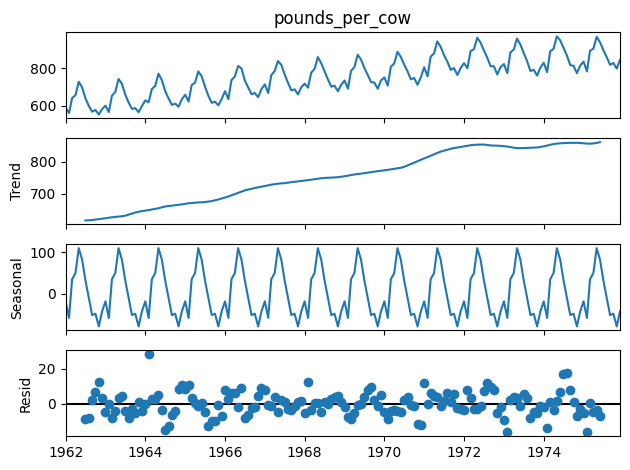

In [3]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [4]:
water = pd.read_csv('.//water.csv', parse_dates=True, index_col=[0])
print(water.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 1983-01-01 to 1994-04-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   water_consumers  136 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB
None


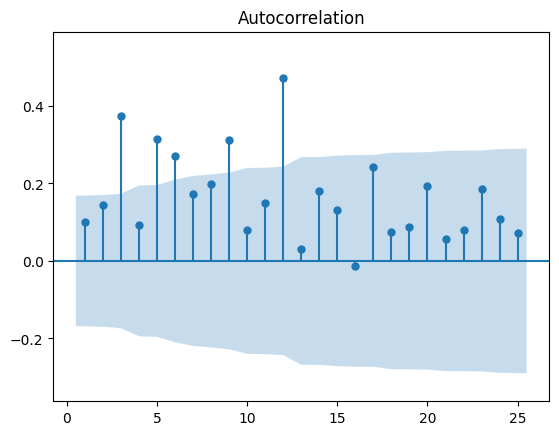

In [5]:
# Create figure and subplot
fig, ax1 = plt.subplots()
from  statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False, ax=ax1, auto_ylims=True)

# Show figure
plt.show()

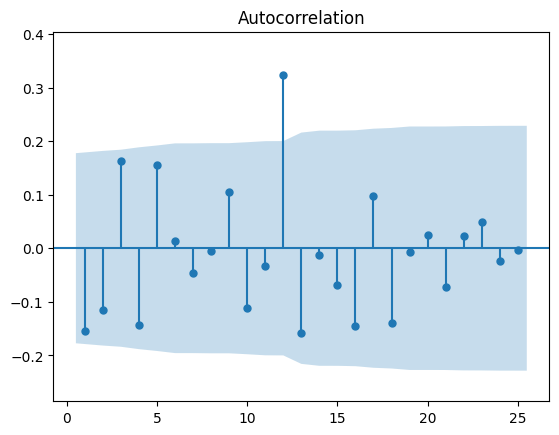

In [6]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1, auto_ylims=True)

# Show figure
plt.show()

In [7]:
df1 = pd.read_csv('.//df1.csv', parse_dates=True, index_col=[0])
df2 = pd.read_csv('.//df2.csv', parse_dates=True, index_col=[0])
df3 = pd.read_csv('.//df3.csv', parse_dates=True, index_col=[0])
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2013-01-01 to 2013-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2013-01-01 to 2013-03-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2013-01-01 to 2013-04-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None


In [20]:
df1

,Y
2013-01-01,-259.864025
2013-01-02,695.803849
2013-01-03,25.506578
2013-01-04,-474.447067
2013-01-05,450.390057
...,...
2013-03-27,1270.937970
2013-03-28,811.638467
2013-03-29,-1690.366304
2013-03-30,335.597322


In [8]:
# Create a SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.320
Date:                           Mon, 27 Nov 2023   AIC                           1118.640
Time:                                   12:20:59   BIC                           1125.896
Sample:                               01-01-2013   HQIC                          1121.555
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1025      0.103      0.995      0.320      -0.099       0.304
ar.S.L7        0.2811      0.105      2.690

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))
# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Mon, 27 Nov 2023   AIC                           1130.679
Time:                                    12:21:00   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110   

In [10]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

aus_employment = pd.read_csv('.//aus_employment.csv', parse_dates=True, index_col=[0])
print(aus_employment.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1978-01-01 to 1991-03-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   people_employed  159 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB
None


In [11]:
# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

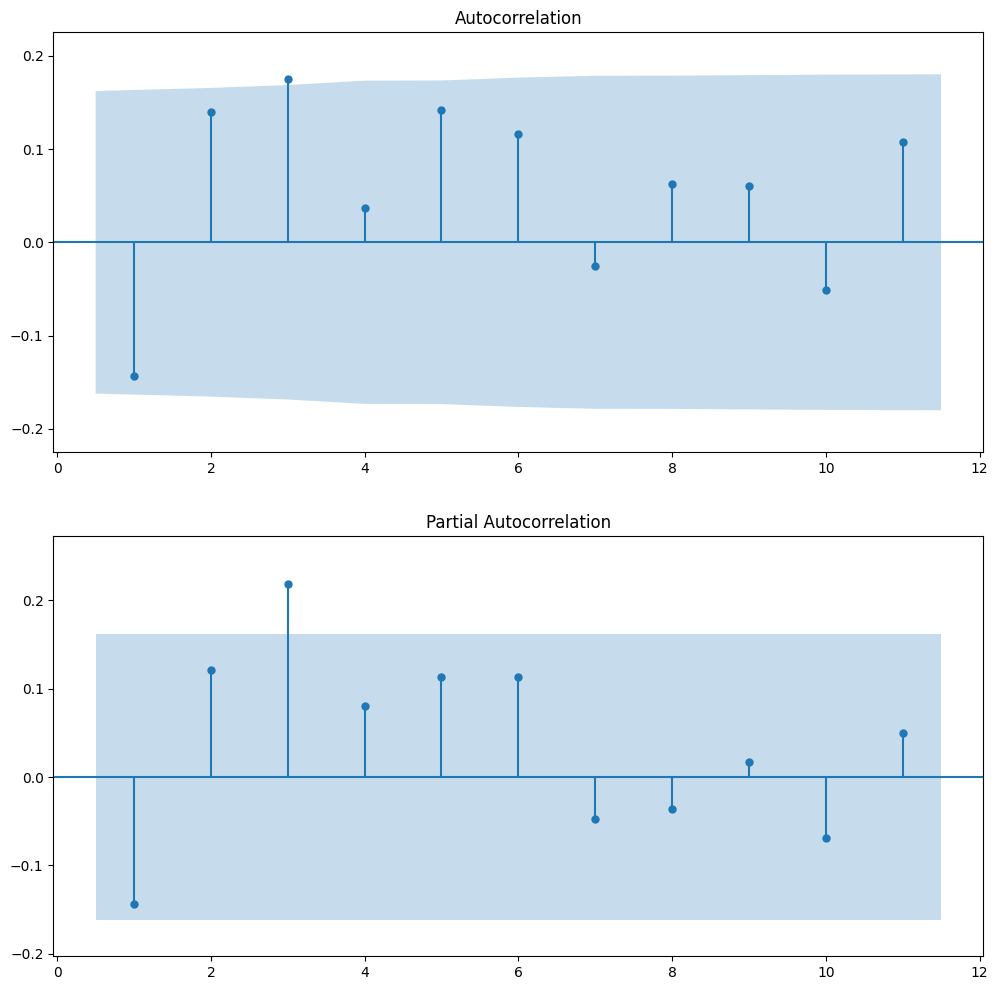

In [12]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,12))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1, auto_ylims=True)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2, auto_ylims=True)

plt.show()

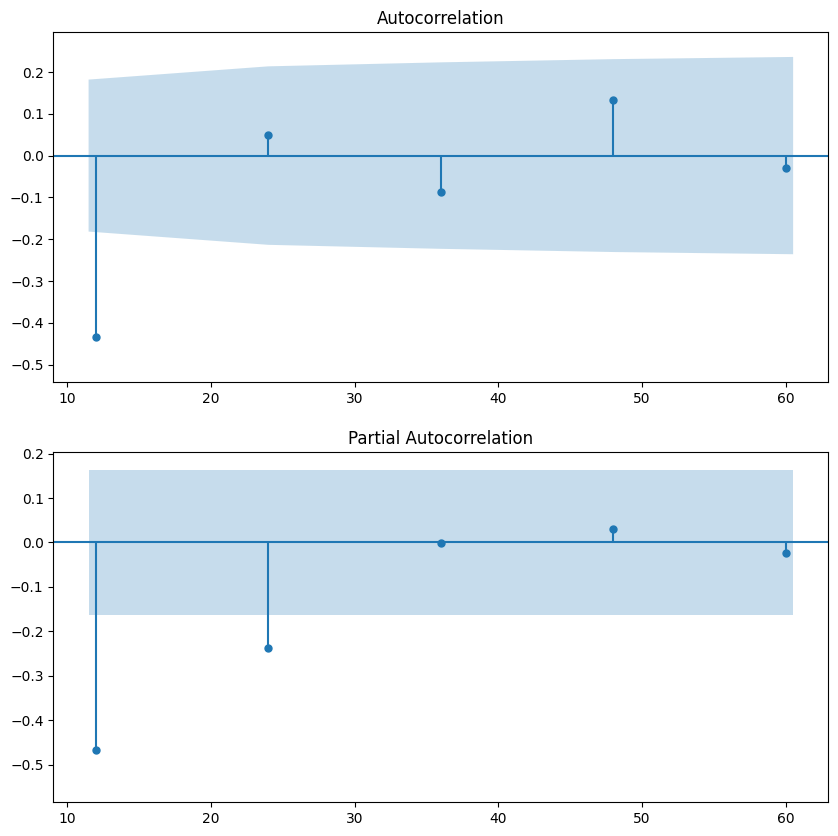

In [13]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1, auto_ylims=True)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2, auto_ylims=True)

plt.show()

In [14]:
dates = np.array(['1973-10-01T00:00:00.000000000', '1973-11-01T00:00:00.000000000',
       '1973-12-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-02-01T00:00:00.000000000', '1974-03-01T00:00:00.000000000',
       '1974-04-01T00:00:00.000000000', '1974-05-01T00:00:00.000000000',
       '1974-06-01T00:00:00.000000000', '1974-07-01T00:00:00.000000000',
       '1974-08-01T00:00:00.000000000', '1974-09-01T00:00:00.000000000',
       '1974-10-01T00:00:00.000000000', '1974-11-01T00:00:00.000000000',
       '1974-12-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1975-02-01T00:00:00.000000000', '1975-03-01T00:00:00.000000000',
       '1975-04-01T00:00:00.000000000', '1975-05-01T00:00:00.000000000',
       '1975-06-01T00:00:00.000000000', '1975-07-01T00:00:00.000000000',
       '1975-08-01T00:00:00.000000000', '1975-09-01T00:00:00.000000000',
       '1975-10-01T00:00:00.000000000'], dtype='datetime64[ns]')


In [15]:
dates

array(['1973-10-01T00:00:00.000000000', '1973-11-01T00:00:00.000000000',
       '1973-12-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1974-02-01T00:00:00.000000000', '1974-03-01T00:00:00.000000000',
       '1974-04-01T00:00:00.000000000', '1974-05-01T00:00:00.000000000',
       '1974-06-01T00:00:00.000000000', '1974-07-01T00:00:00.000000000',
       '1974-08-01T00:00:00.000000000', '1974-09-01T00:00:00.000000000',
       '1974-10-01T00:00:00.000000000', '1974-11-01T00:00:00.000000000',
       '1974-12-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1975-02-01T00:00:00.000000000', '1975-03-01T00:00:00.000000000',
       '1975-04-01T00:00:00.000000000', '1975-05-01T00:00:00.000000000',
       '1975-06-01T00:00:00.000000000', '1975-07-01T00:00:00.000000000',
       '1975-08-01T00:00:00.000000000', '1975-09-01T00:00:00.000000000',
       '1975-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
from pandas import Timestamp
wisconsin_test =pd.DataFrame({'number_in_employment': {Timestamp('1973-10-01 00:00:00'): 374.5, Timestamp('1973-11-01 00:00:00'): 380.2, Timestamp('1973-12-01 00:00:00'): 384.6, Timestamp('1974-01-01 00:00:00'): 360.6, Timestamp('1974-02-01 00:00:00'): 354.4, Timestamp('1974-03-01 00:00:00'): 357.4, Timestamp('1974-04-01 00:00:00'): 367.0, Timestamp('1974-05-01 00:00:00'): 375.7, Timestamp('1974-06-01 00:00:00'): 381.0, Timestamp('1974-07-01 00:00:00'): 381.2, Timestamp('1974-08-01 00:00:00'): 383.0, Timestamp('1974-09-01 00:00:00'): 384.3, Timestamp('1974-10-01 00:00:00'): 387.0, Timestamp('1974-11-01 00:00:00'): 391.7, Timestamp('1974-12-01 00:00:00'): 396.0, Timestamp('1975-01-01 00:00:00'): 374.0, Timestamp('1975-02-01 00:00:00'): 370.4, Timestamp('1975-03-01 00:00:00'): 373.2, Timestamp('1975-04-01 00:00:00'): 381.1, Timestamp('1975-05-01 00:00:00'): 389.9, Timestamp('1975-06-01 00:00:00'): 394.6, Timestamp('1975-07-01 00:00:00'): 394.0, Timestamp('1975-08-01 00:00:00'): 397.0, Timestamp('1975-09-01 00:00:00'): 397.2, Timestamp('1975-10-01 00:00:00'): 399.4}})

In [23]:
# # Create ARIMA mean forecast
# arima_pred = arima_results.get_forecast(25)
# arima_mean = arima_pred.predicted_mean

# # Create SARIMA mean forecast
# sarima_pred = sarima_results.get_forecast(25)
# sarima_mean = sarima_pred.predicted_mean
# # Plot mean ARIMA and SARIMA predictions and observed
# plt.plot(dates, sarima_mean, label='SARIMA')
# plt.plot(dates, arima_mean, label='ARIMA')
# plt.plot(wisconsin_test, label='observed')
# plt.legend()
# plt.show()

In [24]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 667.8 kB/s eta 0:00:01
   ------- -------------------------------- 122.9/614.7 kB 1.0 MB/s eta 0:00:01
   ---------- ----------------------------- 163.8/614.7 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/614.7 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/614.7 kB 1.1 MB/s eta 0:00:01
   ----------------- -------------------- 276.5/614.7 kB 947.5 kB/s eta 0:00:01
   ------------------ ------------------- 307.2/614.7 kB 951.8 kB/s eta 0:00:01
   -------------------- ----------------- 337.9/614.7 kB 912.8 kB/s eta 0:00:01
   ------------------------- ------------ 409.6/614.7 kB 983.6 kB/s eta 0:00:01
   ------------------------------ --------- 471.0/614.7 kB 1.0 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/614.7 k

DEPRECATION: Loading egg at c:\users\jdamodhar\appdata\local\programs\python\python311\lib\site-packages\sdgp-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [47]:
df_new = pd.DataFrame({'IPG3113N': {Timestamp('2007-07-01 00:00:00'): 91.10238257168338, Timestamp('2007-08-01 00:00:00'): 100.29651068147524, Timestamp('2007-09-01 00:00:00'): 109.59010818794924, Timestamp('2007-10-01 00:00:00'): 115.3582346379204, Timestamp('2007-11-01 00:00:00'): 117.821400501142, Timestamp('2007-12-01 00:00:00'): 120.09401655626164, Timestamp('2008-01-01 00:00:00'): 108.2558600557468, Timestamp('2008-02-01 00:00:00'): 101.38268453520529, Timestamp('2008-03-01 00:00:00'): 96.90825945533514, Timestamp('2008-04-01 00:00:00'): 91.6650437974939, Timestamp('2008-05-01 00:00:00'): 88.81668369430938, Timestamp('2008-06-01 00:00:00'): 88.97287861038457, Timestamp('2008-07-01 00:00:00'): 85.1332200820323, Timestamp('2008-08-01 00:00:00'): 88.59647283117268, Timestamp('2008-09-01 00:00:00'): 103.30476084900526, Timestamp('2008-10-01 00:00:00'): 114.04825464165552, Timestamp('2008-11-01 00:00:00'): 115.80824377592222, Timestamp('2008-12-01 00:00:00'): 101.66711108314784, Timestamp('2009-01-01 00:00:00'): 89.76943273481918, Timestamp('2009-02-01 00:00:00'): 88.81798198964759, Timestamp('2009-03-01 00:00:00'): 85.37030878456586, Timestamp('2009-04-01 00:00:00'): 79.51150139866355, Timestamp('2009-05-01 00:00:00'): 80.04370261846195, Timestamp('2009-06-01 00:00:00'): 79.36469415657243}}
)
# Assume df_new is the input array with shape (345, 1)
df_new_reshaped = np.reshape(df_new, (24,))
# loaded_model.update(df_new_reshaped)

In [48]:
import joblib

# Set model name
filename='candy_model.pkl'

# Pickle it
joblib.dump(model, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
# loaded_model.update(df_new)

In [ ]:
# Import pmdarima as pm
import pmdarima as pm

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1,
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.699, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.585, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.418, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.870, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1125.340, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1120.007, Time=0.45 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.898, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1121.058, Time=0.28 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1119.151, Time=0.26 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.433, Time=0.15 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.903, Time=0.44 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1120.149, Time=0.17 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1120.015, Time=0.33 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : 

In [ ]:
# Create model
model2 = pm.auto_arima(df2,
                       seasonal=False,
                       d=1,
                       trend='c',
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1153.963, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1130.992, Time=0.06 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 0.765 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(2, 1, 1)   Log Likelihood        

In [ ]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1594.911, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1584.114, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1595.441, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1582.613, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1576.382, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,1)[7] intercept   : AIC=1578.304, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,1,1)[7]          
Total fit time: 1.476 seconds
                                      SARIMAX Results                                      
Dep. Variable:            

In [ ]:
co2 = pd.read_csv('.//co2_345.csv', parse_dates=True, index_col=[0])
print(co2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 1990-01-01 to 2018-09-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2_ppm  345 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
None


In [ ]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')
# Fit model
results = model.fit()

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


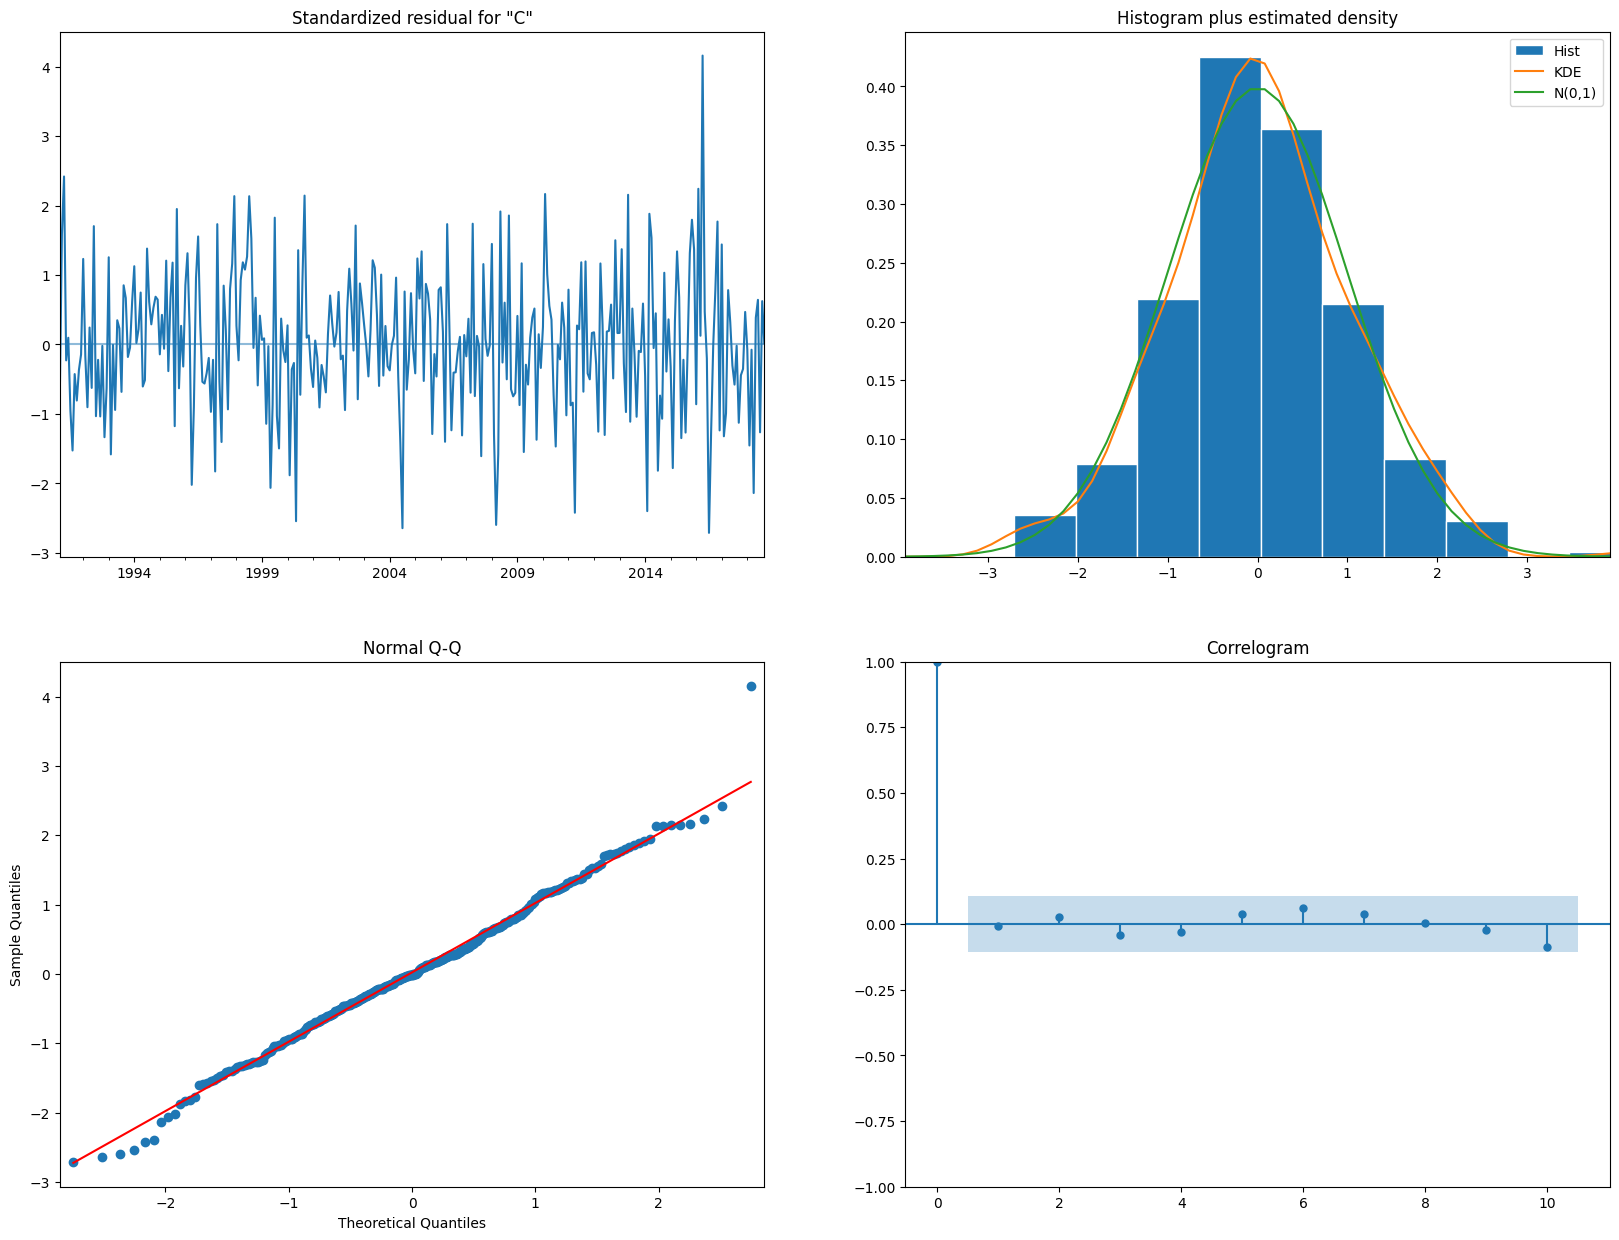

In [ ]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15))
plt.show()

In [ ]:
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

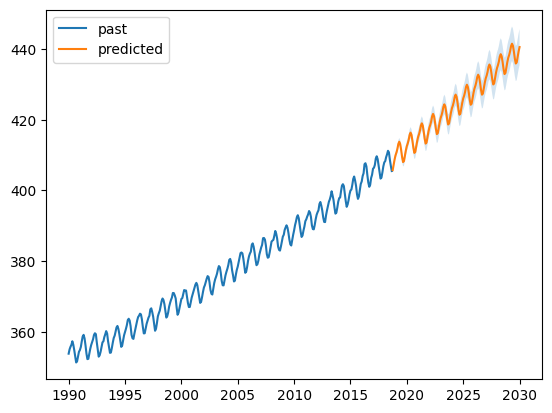

In [ ]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'], 
                 conf_int.loc[:, 'upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [ ]:
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

440.6058646031647
lower CO2_ppm    435.495821
upper CO2_ppm    445.715908
Name: 2030-01-01 00:00:00, dtype: float64
